In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.cluster import DBSCAN

In [2]:
import import_ipynb
import readSequenceFunctions as rsf
import sequenceProcesing as sp

importing Jupyter notebook from readSequenceFunctions.ipynb
importing Jupyter notebook from sequenceProcesing.ipynb


In [3]:
rsf.changeCoding(1)

In [4]:
seqDictStr,seqDictTypes=rsf.prepareDictionary(rsf.pathsBCE)

In [5]:
with open("../Pickle/model3S-c1.store","rb") as file:
    model3S=pickle.load(file)

In [6]:
results=[]
for name in seqDictStr:
    seqTyp=seqDictTypes[name]
    seqStr=seqDictStr[name]
    results.append(sp.calculateF(model3S, seqStr,seqTyp))
results=np.array(results)

In [7]:
results=results.T

In [8]:
kolory=np.maximum(results[0],results[2])-results[1]

## Zywkły

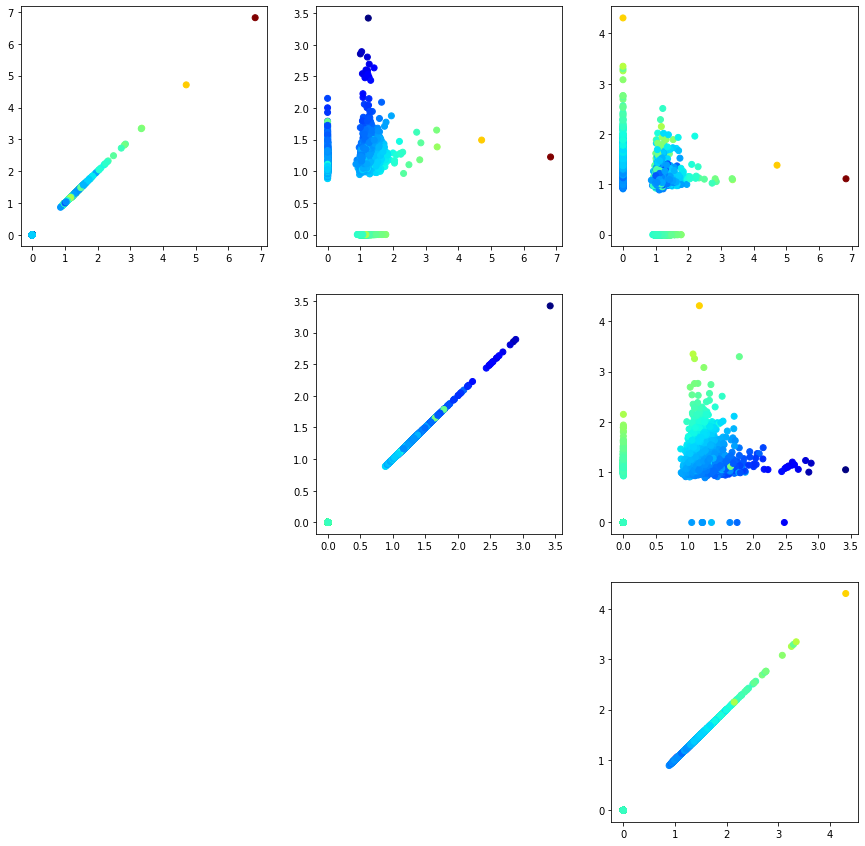

In [9]:
plt.gcf().set_size_inches(15,15)
for i in range(3):
    for j in range(i,3):
        plt.subplot(3,3,i*3+j+1)
        plt.scatter(results[i],results[j],c=kolory,cmap="jet")

## PCA

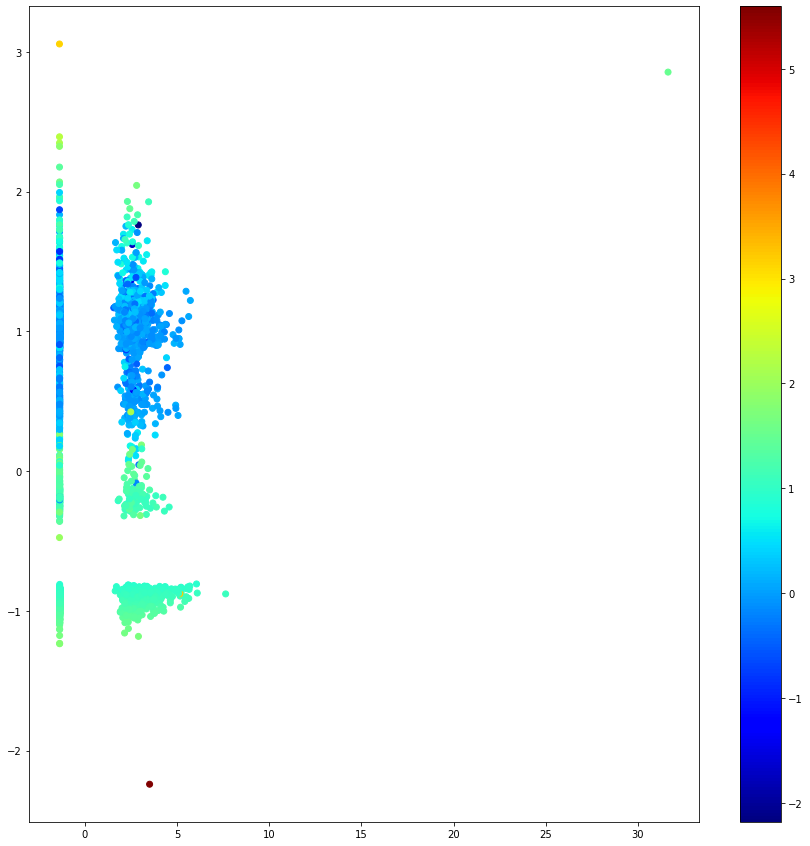

In [10]:
pca=PCA(n_components=2)
pcaWynik=pca.fit_transform(results.T).T

plt.gcf().set_size_inches(15,15)
plt.scatter(pcaWynik[0],pcaWynik[1],c=kolory,cmap="jet")
plt.colorbar()

## TSNE

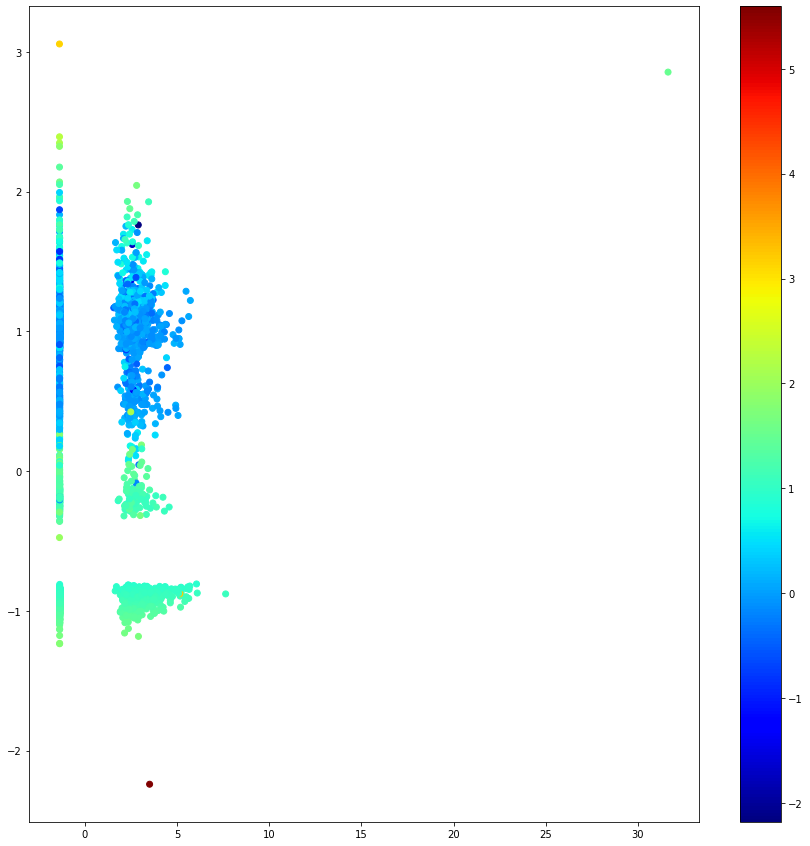

In [11]:
tsne=TSNE()
tsneWynik=tsne.fit_transform(results.T).T

plt.gcf().set_size_inches(15,15)
plt.scatter(pcaWynik[0],pcaWynik[1],c=kolory,cmap="jet")
plt.colorbar()

## Roznice

In [12]:
roznice=np.vstack((results[0]-results[1],results[2]-results[1]))

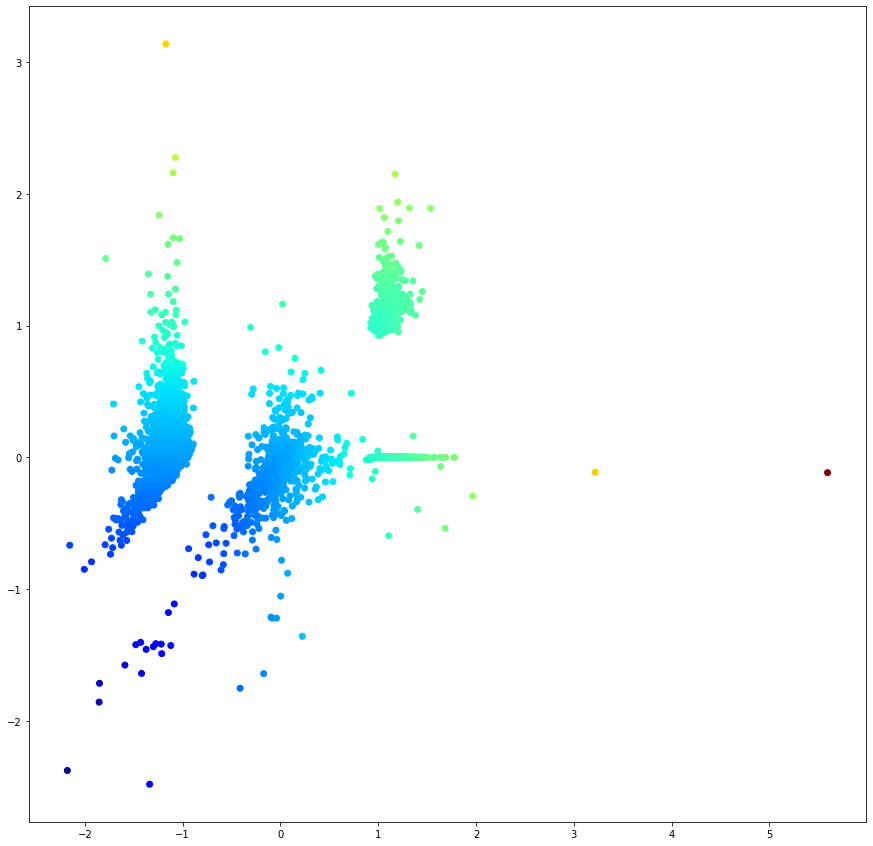

In [13]:
plt.gcf().set_size_inches(15,15)
plt.scatter(roznice[0],roznice[1],c=kolory,cmap="jet")

## DbScan

In [14]:
grupowanie=DBSCAN(eps=0.1, min_samples=17).fit_predict(roznice.T)

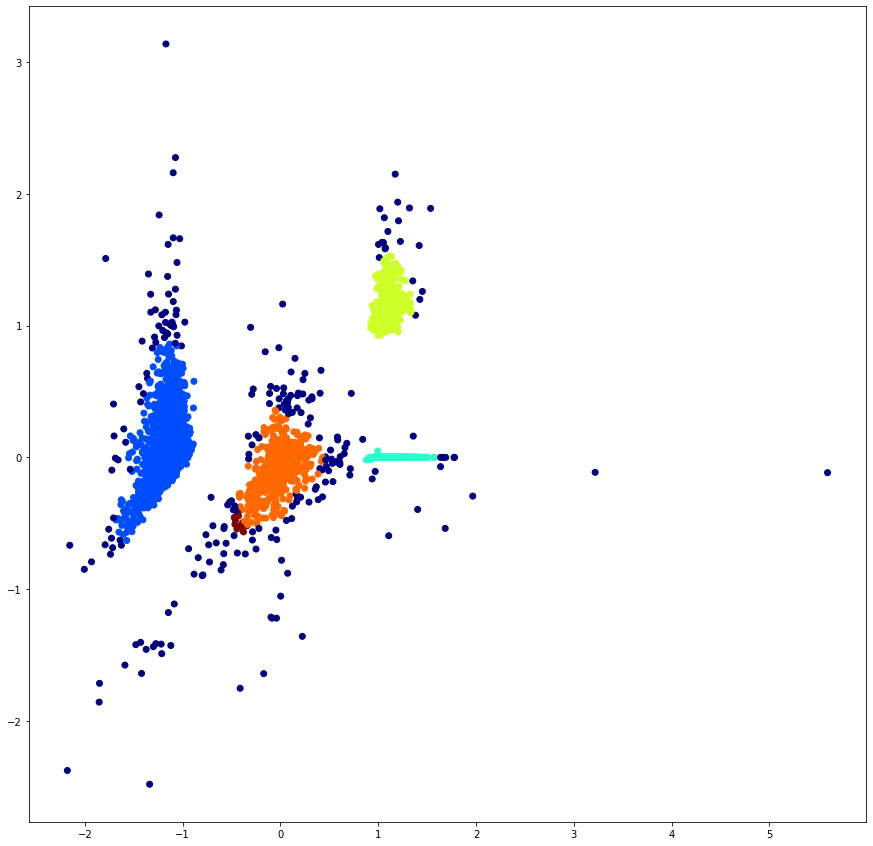

In [15]:
plt.gcf().set_size_inches(15,15)
plt.scatter(roznice[0],roznice[1],c=grupowanie,cmap="jet")

In [16]:
import matplotlib.colors as colors
from itertools import cycle
def plotClustering(X, plt_labels):
    plt_colors = cycle(['aqua','red','green','brown','blue','yellow','black','purple','pink'])

    opisy = np.unique(plt_labels)
    plt_K = opisy.size

    for k in range(plt_K):
        if opisy[k]==-1:
            continue
        color = next(plt_colors)
       
        mask = (plt_labels == opisy[k])
        plt.scatter(X[mask, 0], X[mask, 1], color=color, marker='o',s=8)

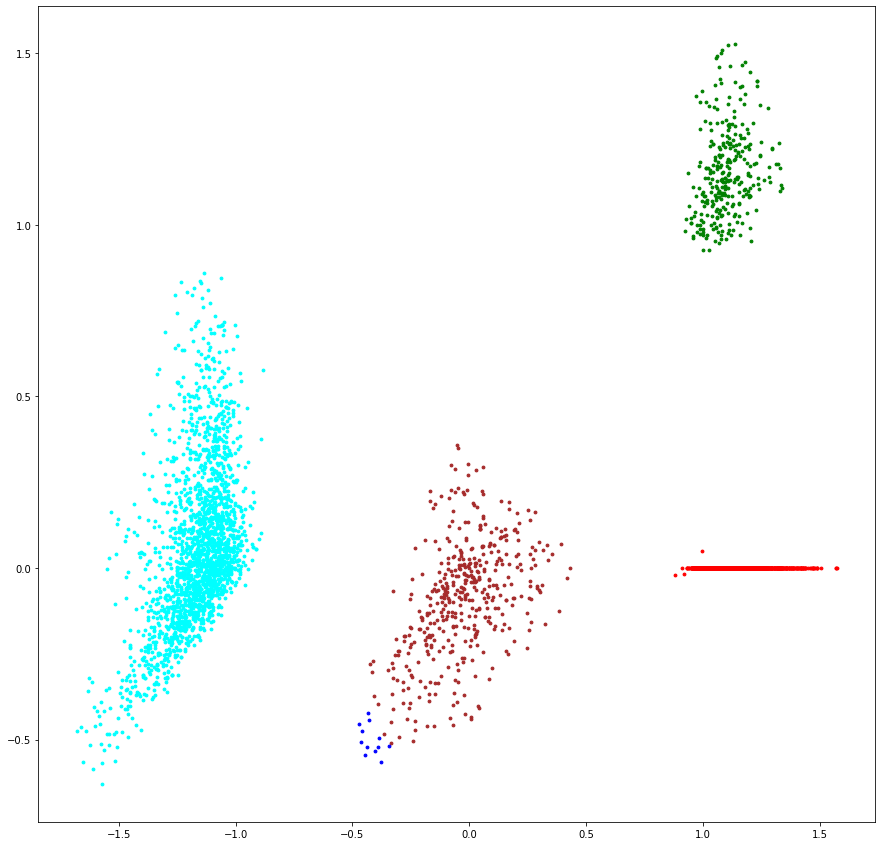

In [17]:
plt.gcf().set_size_inches(15,15)
plotClustering(roznice.T,grupowanie)